# 1 Get the data

In [1]:
import pandas as pd
import sklearn.preprocessing
import numpy as np
import seaborn as sns
import math
import seaborn as sns

In [2]:
df = pd.read_csv('./crime_data_sample.csv', index_col="Référence")
df.head()

,Date crime,Heure crime,Durée d'enquête,Infraction 1,Infraction 2,Infraction 3,Infraction 4,Infraction gp 1,Infraction gp 2,Infraction gp 3,...,Solvabilité 3,Solvabilité 4,Etude de pistes alternatives,Processus d'enquête,Contexte de l'enquête 1,Contexte de l'enquête 2,Contexte de l'enquête 3,Contexte de l'enquête 4,Contexte de l'enquête 5,solvabilité
Référence,,,,,,,,,,,,,,,,,,,,,
591,Déterminé – Infraction continue,Non déterminé - inconnu,98,55 TRAFIC ET REVENTE SANS USAGE DE STUPEFIANTS,56 USAGE - REVENTE DE STUPEFIANTS,57 USAGE DE STUPEFIANTS,58 AUTRES INFRACTIONS A LA LEGISLATION SUR LES...,INFRACTIONS A LA REGLEMENTATION,INFRACTIONS A LA REGLEMENTATION,INFRACTIONS A LA REGLEMENTATION,...,NaN,NaN,0,Pro-actif - Initiative (ICLA),RET - Retard manifeste d'une réponse à réquisi...,0,0,0,0,2
581,Déterminé - Date précise,Non déterminé - inconnu,28,57 USAGE DE STUPEFIANTS,NaN,NaN,NaN,INFRACTIONS A LA REGLEMENTATION,NaN,NaN,...,NaN,NaN,0,Réactif - Auto-résolution (CILA),0,0,0,0,0,1
571,Déterminé - Date précise,Déterminé - Matin (07-12h00),24,32 VOLS A LA TIRE,NaN,NaN,NaN,ATTEINTES AUX BIENS,NaN,NaN,...,NaN,NaN,1,Réactif – Investigation (CILA),0,0,0,0,0,1
561,Déterminé - Date précise,Déterminé - Nuit 1 (22-02h00),2,7 AUTRES COUPS ET BLESSURES VOLONTAIRES CRIMIN...,NaN,NaN,NaN,ATTEINTES AUX PERSONNES,NaN,NaN,...,NaN,NaN,0,Réactif - Flagrant-délit (LCIA),GR - Gravité ou sensibilité des faits,0,0,0,0,1
551,Déterminé - Date précise,Non déterminé - Découverte au matin,43,27 CAMBRIOLAGES DE LOCAUX D HABITATION PRINCIPALE,NaN,NaN,NaN,ATTEINTES AUX BIENS,NaN,NaN,...,NaN,NaN,0,Réactif – Investigation (CILA),STAT - Catégorie de crime faisant l'objet d'un...,0,0,0,0,1


# 2 Getting a feel for the dataset

## The headers and possible values in english

In [3]:
for h in df.columns:
    print(f"{h}\n\t{sorted(set(df[h].dropna()))}")

Date crime
	['Déterminé - Date précise\xa0', 'Déterminé - Infractions multiples', 'Déterminé – Infraction continue', "Non déterminé - Découverte suite à période d'absence"]
Heure crime
	['Déterminé - Après-midi (12-17h00)', 'Déterminé - Matin (07-12h00)', 'Déterminé - Nuit 1 (22-02h00)', 'Déterminé - Soir (17-22h00)', 'Déterminé – Nuit 2 (02-07h00)', 'Non déterminé - Découverte au matin', 'Non déterminé - Découverte fin de journée', 'Non déterminé\xa0- inconnu']
Durée d'enquête
	[-68, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 50, 51, 52, 53, 54, 55, 56, 59, 62, 63, 65, 66, 67, 75, 76, 77, 78, 79, 80, 82, 83, 87, 90, 94, 95, 98, 100, 103, 105, 116, 125, 128, 135, 140, 158, 167, 172, 173, 181, 182, 185, 191, 199, 206, 211, 220, 224, 230, 235, 237, 245, 270, 276, 291, 335, 373, 375, 385, 397, 413, 426, 462, 518, 626, 678]
Infraction 1
	['0 DECOUVERTE CADAVRE', '11 MENACES OU CHANTAGES 

* Reference
  * Unique integer ID
* Crime date
  * Precise date
  * Multiple offenses
  * Ongoing offense
  * Unknown
* Crime time
  * Known
    * Morning
    * Afternoon
    * Evening
    * Early night
    * Late night
  * Unknown
    * Found in the morning
    * Found in the evening
    * just unknown
* Investigation duration
  * Number of days
* Offense #1 etc.
  * Integer code (let's ignore the textual description)
* Offense group #1 etc.
  * Property damage
  * Personal damage
  * Generic rule breaking
* Attempt
  * yes/no
* Solved ?
  * No
    * Unknown perp
    * Not an actual crime
    * Perp known but not enough evidence
  * Somewhat
    * Good start, unfinished
    * Out of jurisdiction
  * Yes
    * almost
    * all


etc.


# 3 Tidying data

* We train a One-Hot encoder on the problematic columns.
* We check that the categories that have been learned are the one we want, in the order we want them.
* We replace nans values with a symbol that does not exist in the categories
* We transform each column and add the result together

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(list(set(df['Infraction 1']))).reshape(-1, 1))
# enc.transform(([['0 DECOUVERTE CADAVRE'], ['93 TRAVAIL CLANDESTIN']])).toarray()

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [25]:
def one_hot_encode(df, name, *cols, key=None):
    """Return a dataframe with a one hot encoding of the given columns of the given dataframe"""
    sorted_unique_values = sorted(set(sum([list(df[h].dropna())
                                              for h in cols],
                                          [])),
                                  key=key)
    ohe = sklearn.preprocessing.OneHotEncoder(sparse=False, 
                                              handle_unknown='ignore',
                                              categories=[sorted_unique_values])
    ohe.fit(np.array(sorted_unique_values, dtype=object).reshape(-1, 1))
    assert (ohe.categories_ == np.array(ohe.categories)).reshape(-1).all(), f"Fitted categories are not those we expected {ohe.categories} vs {ohe.categories_} : {ohe.categories_ == np.array(ohe.categories)}"
    
    # ohe doesnt like NaN
    assert "N/A" not in sorted_unique_values, "Find another symbol to replace missing data with"
    
    index = None
    data_array = np.zeros((df.shape[0], len(sorted_unique_values)))
    for colname in cols:
        # ohe.transform is quite annoying with what it accepts as an argument
        col_data = np.array(df[colname].apply(lambda x: x if x==x else "N/A")).reshape(-1, 1)
        
        if index is None:
            index = df[colname].index
        assert all(index == df[colname].index), "All columns do not share the same index"
        
        data_array = (data_array + ohe.transform(col_data)).astype(bool)
    
    return pd.DataFrame(index=index, columns=pd.MultiIndex.from_product([[name], sorted_unique_values]), data=data_array)

one_hot_encode(df, 'Infraction', 'Infraction 1', 'Infraction 2', 'Infraction 3', 'Infraction 4', key=lambda x: int(x.split(' ')[0]))

Infraction  \
          0 DECOUVERTE CADAVRE   
Référence                        
591                      False   
581                      False   
571                      False   
561                      False   
551                      False   
...                        ...   
13                       False   
12                       False   
11                       False   
10                       False   
1                        False   

                                                                               \
          7 AUTRES COUPS ET BLESSURES VOLONTAIRES CRIMINELS OU CORRECTIONNELS   
Référence                                                                       
591                                                    False                    
581                                                    False                    
571                                                    False                    
561                                                     True                    
551                                                    False                    
...                                                      ...                    
13                                                      True                    
12                                                     False                    
11                                                     False                    
10                                                     False                    
1                                                      False                    

                                                           \
          11 MENACES OU CHANTAGES POUR EXTORSION DE FONDS   
Référence                                                   
591                                                 False   
581                                                 False   
571                                                 False   
561                                                 False   
551                                                 False   
...                                                   ...   
13                                                  False   
12                                                  False   
11                                                  False   
10                                                  False   
1                                                   False   

                                                     \
          12 MENACES OU CHANTAGES DANS UN AUTRE BUT   
Référence                                             
591                                           False   
581                                           False   
571                                           False   
561                                           False   
551                                           False   
...                                             ...   
13                                            False   
12                                            False   
11                                            False   
10                                            False   
1                                             False   

                                                          \
          13 ATTEINTES A LA DIGNITE ET A LA PERSONNALITE   
Référence                                                  
591                                                False   
581                                                False   
571                                                False   
561                                                False   
551                                                False   
...                                                  ...   
13                                                 False   
12                                                 False   
11                                                 False   
10                                                 False   
1 

In [26]:
one_hot_encode(df, 'Infraction Group', 'Infraction gp 1', 'Infraction gp 2', 'Infraction gp 3', 'Infraction gp 4')

Infraction Group                          \
          ATTEINTES AUX BIENS ATTEINTES AUX PERSONNES   
Référence                                               
591                     False                   False   
581                     False                   False   
571                      True                   False   
561                     False                    True   
551                      True                   False   
...                       ...                     ...   
13                      False                    True   
12                       True                   False   
11                       True                   False   
10                       True                   False   
1                       False                   False   

                                           
          INFRACTIONS A LA REGLEMENTATION  
Référence                                  
591                                  True  
581                                  True  
571                                 False  
561                                 False  
551                                 False  
...                                   ...  
13                                  False  
12                                  False  
11                                  False  
10                                  False  
1                                    True  

[195 rows x 3 columns]

For the *investigation context* columns, we got to do some preprocessing first, as the dataset was loaded as a mix of strings and integers, and '0' != 0. We just replace all 0 with the NaN value, and then everything is a string or NaN and our function works.

In [27]:
context_cols = [f"Contexte de l'enquête {i}" for i in range(1, 6)]
for colname in context_cols:
    df[colname] = df[colname].apply(lambda x: x if x != 0 and x != '0' else float('nan'))
one_hot_encode(df, 'Contexte', *context_cols)

Contexte  \
          FAUT - Négligence, inertie ou faute de l'enquêteur ou du magistrat   
Référence                                                                      
591                                                    False                   
581                                                    False                   
571                                                    False                   
561                                                    False                   
551                                                    False                   
...                                                      ...                   
13                                                     False                   
12                                                     False                   
11                                                     False                   
10                                                     False                   
1                                                      False                   

                                                                                                   \
          FIN - Refus d'un acte d'enquête essentiel  par le magistrat au regard du coût financier   
Référence                                                                                           
591                                                    False                                        
581                                                    False                                        
571                                                    False                                        
561                                                    False                                        
551                                                    False                                        
...                                                      ...                                        
13                                                     False                                        
12                                                     False                                        
11                                                     False                                        
10                                                     False                                        
1                                                      False                                        

                                                 \
          GR - Gravité ou sensibilité des faits   
Référence                                         
591                                       False   
581                                       False   
571                                       False   
561                                        True   
551                                       False   
...                                         ...   
13                                        False   
12                                        False   
11                                        False   
10                                        False   
1                                         False   

                                                                                                                                                                                      \
          PERT - Acte d'investigation réalisé tardivement ayant entraîné perte d'éléments d'enquête (constatations, exploitation PTS, vidéo-protection, téléphonie, témoignage, … )    
Référence                                                                                                                                                                              
591                                                    False                                                                                                                           
581                                                    False                     

The same 0->NaN transformation is necessary for the *stolen objects* columns

In [28]:
stolen_goods_cols = [f'Objet dérobé {i}' for i in range(1, 9)]
for colname in stolen_goods_cols:
    df[colname] = df[colname].apply(lambda x: x if x != 0 and x != '0' else float('nan'))
one_hot_encode(df, 'Vol', *stolen_goods_cols)

Vol                                             \
          Accessoires de véhicule Autres objets identifiables par la victime   
Référence                                                                      
591                         False                                      False   
581                         False                                      False   
571                         False                                      False   
561                         False                                      False   
551                         False                                      False   
...                           ...                                        ...   
13                          False                                      False   
12                          False                                      False   
11                          False                                      False   
10                          False                                      False   
1                           False                                      False   

                                                                 \
          Autres objets non identifiables par la victime Bijoux   
Référence                                                         
591                                                False  False   
581                                                False  False   
571                                                False   True   
561                                                False  False   
551                                                False   True   
...                                                  ...    ...   
13                                                 False  False   
12                                                 False  False   
11                                                 False  False   
10                                                 False  False   
1                                                  False  False   

                                                                              \
          Documents d'identité Informatique / multimédia Numéraire Téléphone   
Référence                                                                      
591                      False                     False     False     False   
581                      False                     False     False     False   
571                      False                     False     False     False   
561                      False                     False     False     False   
551                      False                      True     False     False   
...                        ...                       ...       ...       ...   
13                       False                     False     False     False   
12                       False                     False      True     False   
11                       False                     False     False     False   
10                       False                     False     False     False   
1                        False                     False     False     False   

                    
          Véhicule  
Référence           
591          False  
581          False  
571          False  
561          False  
551          False  
...            ...  
13           False  
12           False  
11           False  
10            True  
1            False  

[195 rows x 9 columns]

And once again for the *solvability* columns

In [29]:
solvability_cols = [f'Solvabilité {i}' for i in range(1, 5)]
for colname in solvability_cols:
    df[colname] = df[colname].apply(lambda x: x if x != 0 and x != '0' else float('nan'))
one_hot_encode(df, 'Solvabilité',  *solvability_cols)

Solvabilité  \
          Objets traçables   
Référence                    
591                  False   
581                  False   
571                  False   
561                  False   
551                  False   
...                    ...   
13                   False   
12                   False   
11                   False   
10                    True   
1                    False   

                                                                              \
          Prélèvements dont l'exploitabilité n'est pas déterminée à ce stade   
Référence                                                                      
591                                                    False                   
581                                                    False                   
571                                                    False                   
561                                                    False                   
551                                                     True                   
...                                                      ...                   
13                                                     False                   
12                                                     False                   
11                                                     False                   
10                                                     False                   
1                                                      False                   

                                                                            \
          Prélèvements exploitables Suspect identifiable Suspect identifié   
Référence                                                                    
591                           False                 True              True   
581                           False                 True             False   
571                           False                False             False   
561                           False                False             False   
551                           False                False             False   
...                             ...                  ...               ...   
13                            False                False              True   
12                            False                 True             False   
11                            False                False             False   
10                            False                False             False   
1                             False                False             False   

                                                                       
          Suspect interpellé Véhicule identifiable Véhicule identifié  
Référence                                                              
591                    False                 False              False  
581                    False                 False              False  
571                    False                 False              False  
561                     True                 False              False  
551                    False                 False              False  
...                      ...                   ...                ...  
13                     False                 False               True  
12                     False                 False              False  
11                     False                 False              False  
10                     False                 False              False  
1                       True                 False              False  

[195 rows x 8 columns]

In [39]:
categorical_cols = ['Résolution', 'Date crime','Tentative',
                   'Nature du lieu', 'Lieu', 'Moyen de transport utilisé', 'Arme utilisée', 'Motif apparent',
                  'Lien avec', 'Victime connaît l\'auteur', 'Service saisi',
                   'Motif changement service',
                  'Détection des faits', "Intervenants sur les lieux de l'infraction", 
                   "Etude de pistes alternatives", "Processus d'enquête", "solvabilité"]
discrete_cols = ['Heure crime', 'Nombre de services successivement saisis',  
                  'Nb enquêteur successivement responsable', 'Nb enquêteur ayant travaillé sur le dossier', "solvabilité"]
continuous_cols = ['Durée d\'enquête']
plottable_df = df[categorical_cols]
plottable_df.columns = pd.MultiIndex.from_product([['Categorical'], categorical_cols])
discrete_df = df[discrete_cols]
discrete_df.columns = pd.MultiIndex.from_product([['Discrete'], discrete_cols])
plottable_df = pd.merge(plottable_df, discrete_df, on="Référence")
continuous_df = df[continuous_cols]
continuous_df.columns = pd.MultiIndex.from_product([['Continuous'], continuous_cols])
plottable_df = pd.merge(plottable_df, continuous_df, on="Référence")
plottable_df = pd.merge(plottable_df, one_hot_encode(df, 'Infraction', 'Infraction 1', 'Infraction 2', 'Infraction 3',
                                                     'Infraction 4',
                                                     key=lambda x: int(x.split(' ')[0])),
                        on="Référence")
plottable_df = pd.merge(plottable_df, one_hot_encode(df, 'Infraction Group', 'Infraction gp 1', 'Infraction gp 2', 
                                                     'Infraction gp 3', 'Infraction gp 4'),
                        on="Référence")
plottable_df = pd.merge(plottable_df, one_hot_encode(df, 'Vol', *stolen_goods_cols), on="Référence")
plottable_df = pd.merge(plottable_df, one_hot_encode(df, 'Solvabilité', *solvability_cols), on="Référence")
plottable_df = pd.merge(plottable_df, one_hot_encode(df, 'Contexte', *context_cols), on="Référence")
plottable_df.to_excel("./tidy_crime_data_sample.xls")
plottable_df.head()

Categorical                                   \
                                  Résolution                       Date crime   
Référence                                                                       
591                           Résolu - Total  Déterminé – Infraction continue   
581                           Résolu - Total        Déterminé - Date précise    
571        Non résolu - Auteur non identifié        Déterminé - Date précise    
561                           Résolu - Total        Déterminé - Date précise    
551        Non résolu - Auteur non identifié        Déterminé - Date précise    

                                                             \
          Tentative Nature du lieu                     Lieu   
Référence                                                     
591               N         Public            Voie publique   
581               N         Public                    Hôtel   
571               N          Privé          Chambre d'hôtel   
561               N          Privé  Habitation individuelle   
551               N          Privé    Habitation collective   

                                                                  \
          Moyen de transport utilisé               Arme utilisée   
Référence                                                          
591                          Inconnu                      Aucune   
581                            Aucun                      Aucune   
571                            Aucun                      Aucune   
561                            Aucun  Arme blanche / contondante   
551                          Inconnu                      Aucune   

                                                                        \
                    Motif apparent                           Lien avec   
Référence                                                                
591                    Rationalité            Un trafic de stupéfiants   
581        Négligence / Imprudence  Consommation d'alcool ou de drogue   
571                        Inconnu                               Aucun   
561                        Emotion  Consommation d'alcool ou de drogue   
551                        Inconnu                               Aucun   

                                    ...  \
          Victime connaît l'auteur  ...   
Référence                           ...   
591                            Non  ...   
581                            Non  ...   
571                            Non  ...   
561                 Membre famille  ...   
551                            Non  ...   

                                                                    Contexte  \
          FAUT - Négligence, inertie ou faute de l'enquêteur ou du magistrat   
Référence                                                                      
591                                                    False                   
581                                                    False                   
571                                                    False                   
561                                                    False                   
551                                                    False                   

                                                                                                   \
          FIN - Refus d'un acte d'enquête essentiel  par le magistrat au regard du coût financier   
Référence                                                                                           
591                                                    False                                        
581                                                    False                                        
571                                                    False                                        
561                                                    False                                        
551                                             

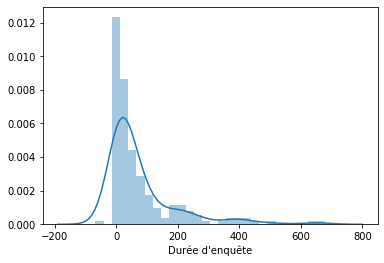

In [20]:
sns.distplot(plottable_df['Durée d\'enquête'])

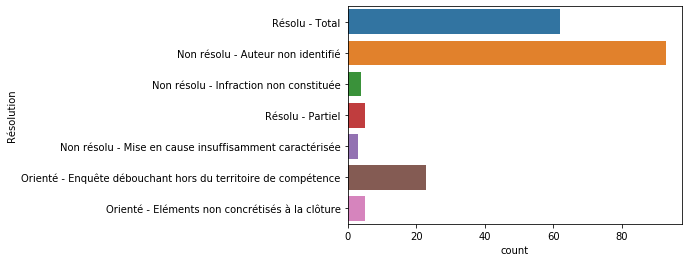

In [21]:
sns.countplot(data=plottable_df, y='Résolution')

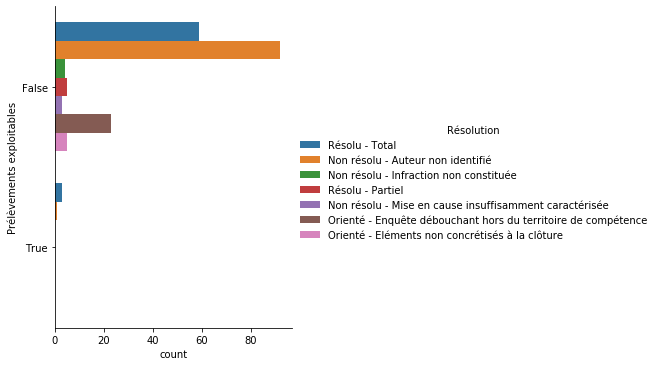

In [16]:
sns.catplot(data=plottable_df, hue="Résolution", y="Prélèvements exploitables", kind="count")

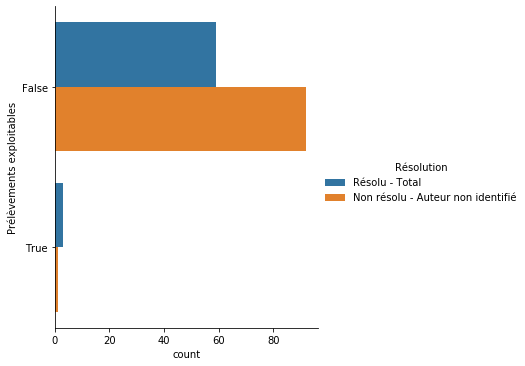

In [17]:
sns.catplot(data=plottable_df[(plottable_df['Résolution'] == 'Résolu - Total') | (plottable_df['Résolution'] == 'Non résolu - Auteur non identifié')],
               hue="Résolution", y="Prélèvements exploitables", kind="count")

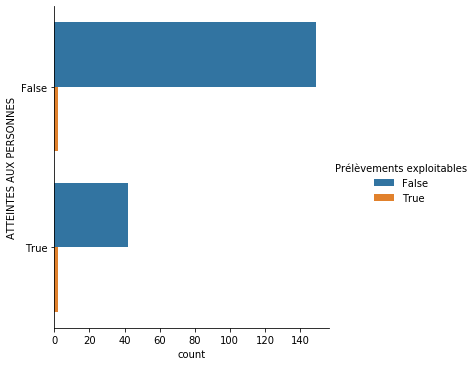

In [18]:
sns.catplot(data=plottable_df,
               y="ATTEINTES AUX PERSONNES", hue="Prélèvements exploitables", kind="count")

In [198]:
ohe.transform(np.array(df['Infraction 2'].apply(lambda x: x if x==x else "N/A")).reshape(-1, 1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Offense                    \
    0 DECOUVERTE CADAVRE 107 AUTRES DELITS   
0                    NaN               NaN   
1                    NaN               NaN   
2                    NaN               NaN   
3                    NaN               NaN   
4                    NaN               NaN   
..                   ...               ...   
190                  NaN               NaN   
191                  NaN               NaN   
192                  NaN               NaN   
193                  NaN               NaN   
194                  NaN               NaN   

                                                     \
    11 MENACES OU CHANTAGES POUR EXTORSION DE FONDS   
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
..                                              ...   
190                                             NaN   
191                                             NaN   
192                                             NaN   
193                                             NaN   
194                                             NaN   

                                               \
    12 MENACES OU CHANTAGES DANS UN AUTRE BUT   
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...   
190                                       NaN   
191                                       NaN   
192                                       NaN   
193                                       NaN   
194                                       NaN   

                                                    \
    13 ATTEINTES A LA DIGNITE ET A LA PERSONNALITE   
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
..                                             ...   
190                                            NaN   
191                                            NaN   
192                                            NaN   
193                                            NaN   
194                                            NaN   

                                                                                                   \
    25 VOLS AVEC VIOLENCES SANS ARMES CONTRE DES FEMMES SUR LA VOIE PUBLIQUE OU AUTRE LIEU PUBLIC   
0                                                  NaN                                              
1                                                  NaN                                              
2                                                  NaN                                              
3                                                  NaN                                              
4                                                  NaN                                              
..                                                 ...                                              
190                                                NaN                                              
191                                                NaN                                              
192                                                NaN                                              
193                                                NaN                                              
194                                                NaN                                              

                                               

In [100]:
ohe.transform(np.array(df['Infraction 1'][0]).reshape(-1, 1)).todense().reshape(41,)

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
ohe.categories_

In [108]:
ohe.categories_[0]

array(['0 DECOUVERTE CADAVRE', '107 AUTRES DELITS',
       '11 MENACES OU CHANTAGES POUR EXTORSION DE FONDS',
       '12 MENACES OU CHANTAGES DANS UN AUTRE BUT',
       '13 ATTEINTES A LA DIGNITE ET A LA PERSONNALITE',
       '25 VOLS AVEC VIOLENCES SANS ARMES CONTRE DES FEMMES SUR LA VOIE PUBLIQUE OU AUTRE LIEU PUBLIC',
       '27 CAMBRIOLAGES DE LOCAUX D HABITATION PRINCIPALE',
       '29 CAMBRIOLAGES DE LOCAUX INDUSTRIELS, COMMERCIAUX OU FINANCIERS',
       '30 CAMBRIOLAGES D AUTRES LIEUX',
       '31 VOLS AVEC ENTREE PAR RUSE EN TOUS LIEUX', '32 VOLS A LA TIRE',
       '33 VOLS A L ETALAGE',
       '34 VOLS DE VEHICULES DE TRANSPORT AVEC FRET',
       '35 VOLS D AUTOMOBILES',
       '36 VOLS DE VEHICULES MOTORISES A DEUX ROUES',
       '37 VOLS A LA ROULOTTE',
       '38 VOLS D ACCESSOIRES SUR VEHICULES A MOTEUR IMMATRICULES',
       '42 AUTRES VOLS SIMPLES CONTRE DES PARTICULIERS DANS DES LOCAUX PRIVES',
       '43 AUTRES VOLS SIMPLES CONTRE DES PARTICULIERS DANS DES LOCAUX OU LIE

In [223]:
OneHotEncoder?

Init signature: OneHotEncoder(n_values=None, categorical_features=None, categories=None, drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
Docstring:     
Encode categorical integer features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or
strings, denoting the values taken on by categorical (discrete) features.
The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
encoding scheme. This creates a binary column for each category and
returns a sparse matrix or dense array.

By default, the encoder derives the categories based on the unique values
in each feature. Alternatively, you can also specify the `categories`
manually.
The OneHotEncoder previously assumed that the input features take on
values in the range [0, max(values)). This behaviour is deprecated.

This encoding is needed for feeding categorical data to many scikit-learn
estimators, notably linear models and SVMs with the standard ker

In [224]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
# change the FIXMEs for something else...
enc.fit("FIXME")
enc.transform("FIXME")

ValueError: Expected 2D array, got scalar array instead:
array=FIXME.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [47]:
test_untidy = pd.DataFrame(columns=['Case #', "Offense 1", "Offense 2"],
                           data=[[1, "Libel", float('nan')],
                                [2, "Assault", "Burglary"],
                                [3, "Robbery", float('nan')]])
test_untidy

,Case #,Offense 1,Offense 2
0,1,Libel,NaN
1,2,Assault,Burglary
2,3,Robbery,NaN


In [45]:
test_untidy = pd.DataFrame([[1, "Libel", float('nan')],
                            [2, "Assault", "Burglary"],
                            [3, "Robbery", float('nan')]],
                          None, 
                          ['Case #', "Offense 1", "Offense 2"])
test_untidy

,Case #,Offense 1,Offense 2
0,1,Libel,NaN
1,2,Assault,Burglary
2,3,Robbery,NaN


In [90]:
all_offenses = pd.concat([test_untidy['Offense 1'], test_untidy['Offense 2']])

In [103]:
all_offenses.dropna()

0       Libel
1     Assault
2     Robbery
1    Burglary
dtype: object

In [125]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(all_offenses.dropna().to_numpy().reshape(-1, 1))
enc.transform(test_untidy['Offense 1'].to_numpy().reshape(-1, 1)) + enc.transform(purified_second_col.to_numpy().reshape(-1, 1))

array([[0., 0., 1., 0.],
       [1., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [239]:
answer = np.zeros((test_untidy.shape[0], len(enc.categories_[0])))
for col in ['Offense 1', 'Offense 2']:
    answer += enc.transform(test_untidy[col].apply(lambda x: x if x ==x else "N/A").to_numpy().reshape(-1, 1))
pd.DataFrame(index=test_untidy["Case #"], columns=enc.categories_[0], data=answer)

,Assault,Burglary,Libel,Robbery
Case #,,,,
1,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0


In [10]:
%%javascript
Jupyter.notebook.kernel.execute(`notebookName = '${Jupyter.notebook.notebook_name}'`);

<IPython.core.display.Javascript object>

In [12]:
import requests
filenames = ['01_tidy.ipynb', 'crime_data_sample.csv']  # FIXME
student_id = 'B0012121212121' # FIXME
first_name = 'Edouard'  # FIXME
last_name = 'Klein'  # FIXME
hostname_port = 'http://oneclick.rdklein.fr:5564'
for f in filenames:
    r = requests.put(f'{hostname_port}/upload/{student_id}_{first_name}_{last_name}/{f}',
                     data=open(f, 'r').read().encode('utf-8'))
    assert r.status_code == 200, f"Server unhappy because of {r.content}"
    print(r.content)

b'Correctly wrote 295306 bytes in /home/vincent/public/ESSEC/B0012121212121_Edouard_Klein/2019-11-26T17:09/01_tidy.ipynb'
b'Correctly wrote 89255 bytes in /home/vincent/public/ESSEC/B0012121212121_Edouard_Klein/2019-11-26T17:09/crime_data_sample.csv'
